### Plotting scripts for statistics of $\mathcal{D}_\ell$ (distributions etc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
import xarray as xr
import matplotlib as mpl
import cartopy as cpy
import datetime as dt

##### Reading in data (to be midified for reading from hackathon object store)

In [2]:
DATA_DIR = "/work/scratch-pw2/dship/LoSSETT/output/kscale/DYAMOND_SUMMER_0p5deg/"
simid = 'CTC5RAL'
n_scales = 32
fpath_mean = os.path.join(
        DATA_DIR,
        f"DR_test_{simid}_Nl_{n_scales}_DyS_time-mean.nc"
    )

if not os.path.exists(fpath_mean):
    print('mean file doesnt exist - compute')

ds = xr.open_dataset(fpath_mean)
ds['length_scale']

<xarray.DataArray 'length_scale' (length_scale: 32)> Size: 256B
array([  55000.,  110000.,  165000.,  220000.,  275000.,  330000.,  385000.,
        440000.,  495000.,  550000.,  605000.,  660000.,  715000.,  770000.,
        825000.,  880000.,  935000.,  990000., 1045000., 1100000., 1155000.,
       1210000., 1265000., 1320000., 1375000., 1430000., 1485000., 1540000.,
       1595000., 1650000., 1705000., 1760000.])
Coordinates:
  * length_scale             (length_scale) float64 256B 5.5e+04 ... 1.76e+06
    forecast_reference_time  datetime64[ns] 8B ...

##### Stacked histogram plot for each level in atmosphere

Text(0.5, 0.92, 'CTC5RAL DYAMOND Summer | $\\ell$=1760 km')

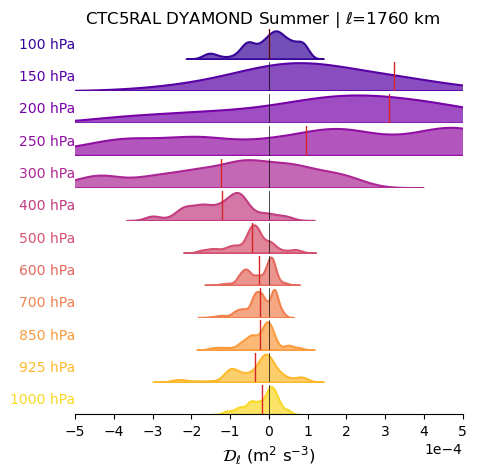

In [5]:
ell=1760000
da = ds['DR_indicator'].sel(length_scale=ell, method='nearest')
da_flat = da.stack(sample=("latitude", "longitude"))
da_flat = da_flat.drop_vars(['latitude', 'longitude'])
df = da_flat.to_dataframe().reset_index()

pal = sns.color_palette("plasma", len(df['pressure'].unique()))
fig, axes = plt.subplots(len(df['pressure'].unique()), 1, figsize=(5, 5), sharex=True)

pressure_levels = sorted(df['pressure'].unique())

mean_values = []
subplot_positions = []

for i, pressure in enumerate(pressure_levels):
    ax = axes[i]

    subset = df[df['pressure'] == pressure] # Get data for this pressure level
  
    color = pal[i] # Get color for this level
    
    # Plot KDE for this pressure level
    sns.kdeplot(data=subset, x="DR_indicator", ax=ax,
                fill=True, color=color, alpha=0.7, linewidth=1.5,
                bw_adjust=1.0, clip_on=True)
    
    # Add the pressure label
    ax.text(-0.00011, 0.5, f"{int(pressure)} hPa", color=color, ha="right", va="center", transform=ax.transAxes)

    # Uncomment this to plot little red lines on each histogram showing the location of the mean. 
    # Can easily be modified to do median as well.
    mean_value = subset["DR_indicator"].mean()
    ax.axvline(x=mean_value, color='tab:red', linewidth=1, label='Mean')

    # Axis formatting        
    ax.set_yticks([])
    ax.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
    ax.set_ylabel('')
    
    # Remove all spines except bottom on the last subplot
    if i < len(pressure_levels) - 1:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xlabel('')
        ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    else:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    
    ax.set_xlim(-5e-4, 5e-4)
    ax.set_xticks([-5e-4,-4e-4,-3e-4,-2e-4,-1e-4,0,1e-4,2e-4,3e-4,4e-4,5e-4])

    ax.axvline(x=0,color='k',linewidth=0.5)

# Set x-label on the bottom axis only
axes[-1].set_xlabel(r"$\mathcal{D}_{\ell}$ (m$^2$ s$^{-3}$)", fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1)  # Less extreme spacing
plt.suptitle(f'{simid} DYAMOND Summer | ' + r'$\ell$' + f'={int(ell / 1000)} km', y=0.92)

In [9]:
# Loop to run for all scales - this will store one png per length scale for all levels in the atmosphere for your desired output_path.
for ell in ds['length_scale'].values:
    da = ds['DR_indicator'].sel(length_scale=ell, method='nearest')
    da_flat = da.stack(sample=("latitude", "longitude"))
    da_flat = da_flat.drop_vars(['latitude', 'longitude'])
    df = da_flat.to_dataframe().reset_index()
    
    pal = sns.color_palette("plasma", len(df['pressure'].unique()))
    fig, axes = plt.subplots(len(df['pressure'].unique()), 1, figsize=(5, 5), sharex=True)
    
    pressure_levels = sorted(df['pressure'].unique())

    mean_values = []
    subplot_positions = []

    for i, pressure in enumerate(pressure_levels):
        ax = axes[i]
    
        subset = df[df['pressure'] == pressure] # Get data for this pressure level
      
        color = pal[i] # Get color for this level
        
        # Plot KDE for this pressure level
        sns.kdeplot(data=subset, x="DR_indicator", ax=ax,
                    fill=True, color=color, alpha=0.7, linewidth=1.5,
                    bw_adjust=1.0, clip_on=True)
        
        # Add the pressure label
        ax.text(-0.00011, 0.5, f"{int(pressure)} hPa", color=color, ha="right", va="center", transform=ax.transAxes)

        # Uncomment this to plot little red lines on each histogram showing the location of the mean. 
        # Can easily be modified to do median as well.
        mean_value = subset["DR_indicator"].mean()
        ax.axvline(x=mean_value, color='red', linewidth=1, label='Mean')

        # Axis formatting        
        ax.set_yticks([])
        ax.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
        ax.set_ylabel('')
        
        # Remove all spines except bottom on the last subplot
        if i < len(pressure_levels) - 1:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xlabel('')
            ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
        
        ax.set_xlim(-5e-4, 5e-4)
        ax.set_xticks([-5e-4,-4e-4,-3e-4,-2e-4,-1e-4,0,1e-4,2e-4,3e-4,4e-4,5e-4])

        ax.axvline(x=0,color='k',linewidth=0.5)

    # Set x-label on the bottom axis only
    axes[-1].set_xlabel(r"$\mathcal{D}_{\ell}$ (m$^2$ s$^{-3}$)", fontsize=12)

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.1)  # Less extreme spacing
    plt.suptitle(f'{simid} DYAMOND Summer | ' + r'$\ell$' + f'={int(ell / 1000)} km', y=0.92)
    ell_km = f"{int(ell / 1000):04d}" # format to 4sf for sorting outputs
    # Save the figure for the current length scale
    output_path = f'/home/users/emg97/emgPlots/Dlu_hist_ridges/LO_ridge_{simid}_DS_l{ell_km}km_wm.png'
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to avoid memory issues